In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
iris = datasets.load_iris(as_frame=True)
x = iris.data
y = iris.target
target_names = iris.target_names


In [4]:
print("First 5 rows of iris dataset:")
display (x.head())
print("\nTarget classes:",target_names)

First 5 rows of iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Target classes: ['setosa' 'versicolor' 'virginica']


In [5]:
x_train ,x_test,y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42)
print("\nTraining set size:",x_train.shape)
print("Training set size:",x_test.shape)



Training set size: (120, 4)
Training set size: (30, 4)


In [6]:
pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("model",LogisticRegression(max_iter=200))
])

In [7]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=200))])

In [8]:
train_accuracy = pipe.score(x_train, y_train)
test_accuracy = pipe.score(x_test, y_test)

print("\nModel Evaluation:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



Model Evaluation:
Training Accuracy: 0.96
Testing Accuracy: 0.93


In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, x, y, cv=cv)
print("\nCross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())



Cross-validation scores: [1.         0.96666667 0.9        1.         0.9       ]
Average CV accuracy: 0.9533333333333334


In [10]:
y_pred = pipe.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



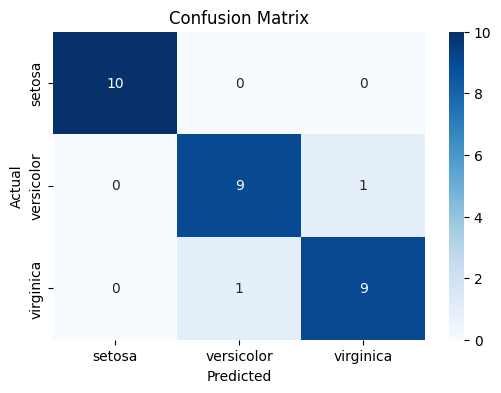

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

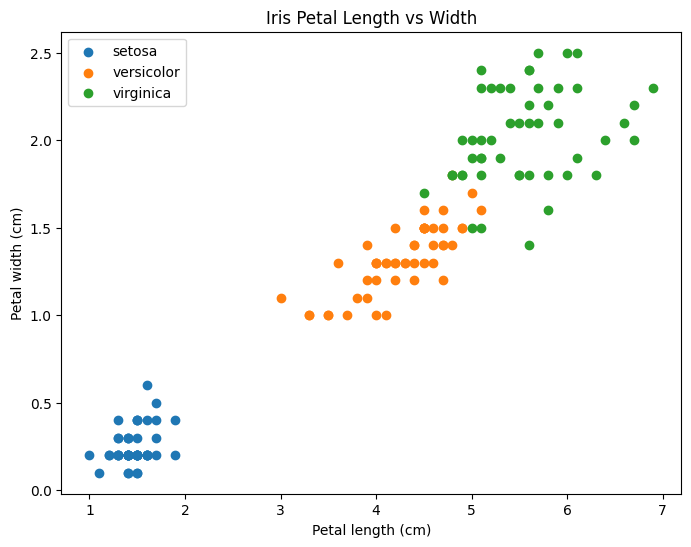

In [12]:
plt.figure(figsize=(8,6))
for i, name in enumerate(target_names):
    plt.scatter(x.loc[y==i, "petal length (cm)"],
                x.loc[y==i, "petal width (cm)"],
                label=name)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Iris Petal Length vs Width")
plt.legend()
plt.show()